https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/

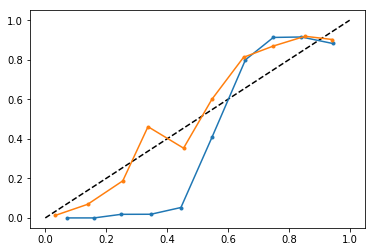

In [3]:
# SVM reliability diagrams with uncalibrated and calibrated probabilities
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
 
# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
    # fit a model
    model = SVC()
    model.fit(trainX, trainy)
    # predict probabilities
    return model.decision_function(testX)
 
# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
    # define model
    model = SVC()
    # define and fit calibration model
    calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
    calibrated.fit(trainX, trainy)
    # predict probabilities
    return calibrated.predict_proba(testX)[:, 1]
 
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# uncalibrated predictions
yhat_uncalibrated = uncalibrated(trainX, testX, trainy)
# calibrated predictions
yhat_calibrated = calibrated(trainX, testX, trainy)
# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(testy, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(testy, yhat_calibrated, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities

#blue color
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.')

#orange color
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.')
pyplot.show()